# Load data

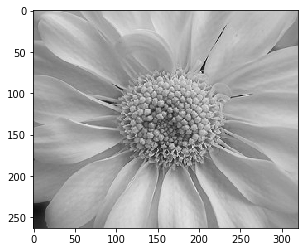

daisy


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Assign data directory and create categories from the folder names
DATADIR = r"C:\Users\Chris\Desktop\flowers"
CATEGORIES = ["daisy","dandelion","rose","sunflower","tulip"]

#Display first image of data
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    print(category)    
    break

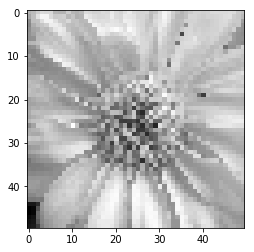

(50, 50)


In [3]:
# Resize images
IMG_SIZE = 50

resize = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(resize, cmap='gray')
plt.show()
print(resize.shape)

In [4]:
# Initialise training data array
training_data = []

# Iterate through folders and resize each image
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data();

In [5]:
# Size of data
print(len(training_data))

4323


In [6]:
# Shuffle data
import random
random.shuffle(training_data)

In [7]:
# Initialise feature and label arrays 
X = []
y = []

In [8]:
# Iterate over the data and separate the features and labels
for features,label in training_data:
    X.append(features);
    y.append(label);

In [9]:
# Reshape data 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
# Normalize features 
X = X / 255;

In [11]:
# Convert labels to one-hot arrays
import keras
y = keras.utils.to_categorical(y, num_classes=5)
y.shape

Using TensorFlow backend.


(4323, 5)

In [12]:
# Split training data for testing purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

# Model

In [19]:
# Adjustable settings

# Batch size
BATCH = 32

# Size of each convolution
CONV_SIZE = (10,10)

# Size of pooling
POOL_SIZE = (5,5)

# Number of epochs
EPOCHS = 10

In [20]:
# Convolutional Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64,CONV_SIZE, input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=POOL_SIZE))

model.add(Flatten()) #Convert 3D inputs to 1D vectors

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(5))
model.add(Activation('softmax')) 

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

fit = model.fit(x_train,
          y_train, 
          batch_size=BATCH, 
          shuffle=True, 
          epochs=EPOCHS, 
          validation_split=0.1,
          verbose=2)

Train on 3501 samples, validate on 389 samples
Epoch 1/10
 - 5s - loss: 1.5573 - acc: 0.2819 - val_loss: 1.4878 - val_acc: 0.3445
Epoch 2/10
 - 5s - loss: 1.4811 - acc: 0.3530 - val_loss: 1.4656 - val_acc: 0.3650
Epoch 3/10
 - 5s - loss: 1.4338 - acc: 0.3842 - val_loss: 1.4424 - val_acc: 0.3728
Epoch 4/10
 - 5s - loss: 1.4010 - acc: 0.4110 - val_loss: 1.4307 - val_acc: 0.4062
Epoch 5/10
 - 5s - loss: 1.3608 - acc: 0.4324 - val_loss: 1.4143 - val_acc: 0.3933
Epoch 6/10
 - 5s - loss: 1.3247 - acc: 0.4479 - val_loss: 1.4226 - val_acc: 0.4113
Epoch 7/10
 - 5s - loss: 1.2756 - acc: 0.4690 - val_loss: 1.3829 - val_acc: 0.4370
Epoch 8/10
 - 5s - loss: 1.2318 - acc: 0.4959 - val_loss: 1.3697 - val_acc: 0.4165
Epoch 9/10
 - 5s - loss: 1.1918 - acc: 0.5221 - val_loss: 1.3741 - val_acc: 0.4293
Epoch 10/10
 - 5s - loss: 1.1217 - acc: 0.5667 - val_loss: 1.3622 - val_acc: 0.4473


In [21]:
# Evaluate Model
model.evaluate(x_test, 
               y_test, 
               batch_size=32, 
               verbose=1 )


433/433 [==============================] - 0s 595us/step


[1.4920703227745744, 0.40877598262549]

In [24]:
# Predict classes using test data
predict = model.predict_classes(x_test, 
                      batch_size=32, 
                      verbose=1)
print(predict)

433/433 [==============================] - 0s 594us/step
[1 1 4 4 1 1 1 1 1 2 3 3 1 0 4 0 4 4 1 4 2 1 2 1 4 2 1 1 0 2 4 2 4 2 1 2 4
 2 4 4 1 2 1 3 2 1 1 0 3 3 1 2 2 4 0 2 1 0 3 1 4 3 4 4 1 4 1 1 1 2 1 1 2 4
 4 4 1 1 1 2 4 4 4 1 4 1 4 4 4 4 2 3 1 1 2 3 1 3 0 1 1 4 2 4 4 1 4 2 4 4 4
 4 1 1 4 1 4 2 4 1 0 1 3 4 2 3 4 4 4 0 2 0 0 2 4 2 4 2 1 1 4 4 2 1 1 1 1 4
 2 4 3 4 4 2 3 0 1 1 4 4 1 4 2 1 1 2 3 4 1 1 4 2 2 0 2 4 2 1 2 3 2 4 1 4 2
 4 3 1 1 1 4 1 0 2 2 0 4 2 1 1 1 1 4 1 4 4 0 2 4 1 2 1 1 1 1 2 4 4 0 2 2 3
 2 1 4 4 1 4 4 1 4 1 0 3 1 1 4 1 4 2 1 1 1 0 4 0 0 2 1 1 0 1 3 1 1 1 3 3 4
 4 1 4 2 2 2 2 1 2 4 4 3 1 2 4 2 0 4 1 2 4 1 4 4 4 1 1 2 4 1 0 1 4 2 4 4 2
 4 4 4 4 1 4 4 2 4 1 1 2 1 4 0 4 4 2 1 1 1 2 4 2 1 1 3 2 4 1 1 4 1 1 3 1 1
 4 4 3 4 3 4 1 4 4 2 4 3 1 4 2 2 4 2 4 4 3 0 1 4 1 4 1 4 4 0 0 4 1 2 1 1 2
 3 1 1 4 1 4 1 1 1 0 4 2 4 2 4 2 4 4 4 1 0 1 2 1 4 4 4 2 2 2 4 3 1 3 1 2 1
 4 4 4 4 1 2 4 2 4 2 4 1 1 4 2 4 1 0 4 1 1 0 1 4 4 4]
